In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [ ]:
diabetes=pd.read_csv('diabetes.csv')

In [4]:
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
570,3,78,70,0,0,32.5,0.270,39,0
399,3,193,70,31,0,34.9,0.241,25,1
305,2,120,76,37,105,39.7,0.215,29,0
510,12,84,72,31,0,29.7,0.297,46,1
465,0,124,56,13,105,21.8,0.452,21,0


In [5]:
diabetes.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [6]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
diabetes_x = diabetes.drop("Outcome", axis=1)
diabetes_y = diabetes["Outcome"]

In [8]:
print(diabetes_x.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

/tmp/ipython-input-2807747172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes, palette='Set2')


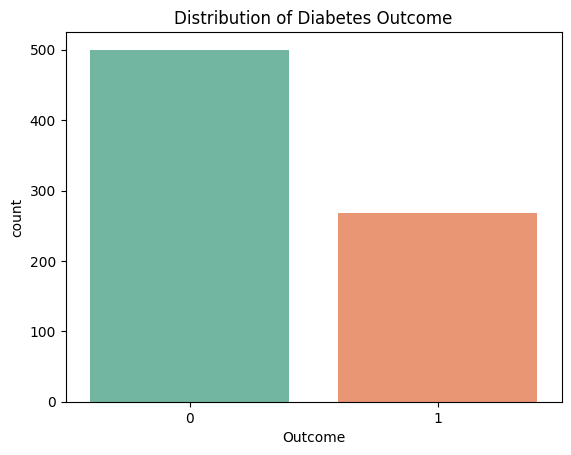

In [9]:
sns.countplot(x='Outcome', data=diabetes, palette='Set2')
plt.title("Distribution of Diabetes Outcome")
plt.show()

In [13]:
diabetes_x_copy=diabetes_x.copy()
diabetes_y_copy=diabetes_y.copy()

In [16]:
rand_sampler = RandomOverSampler(sampling_strategy=1.0, random_state=42)

In [21]:
diabetes_x_resampled, diabetes_y_resampled = rand_sampler.fit_resample(diabetes_x_copy, diabetes_y_copy)

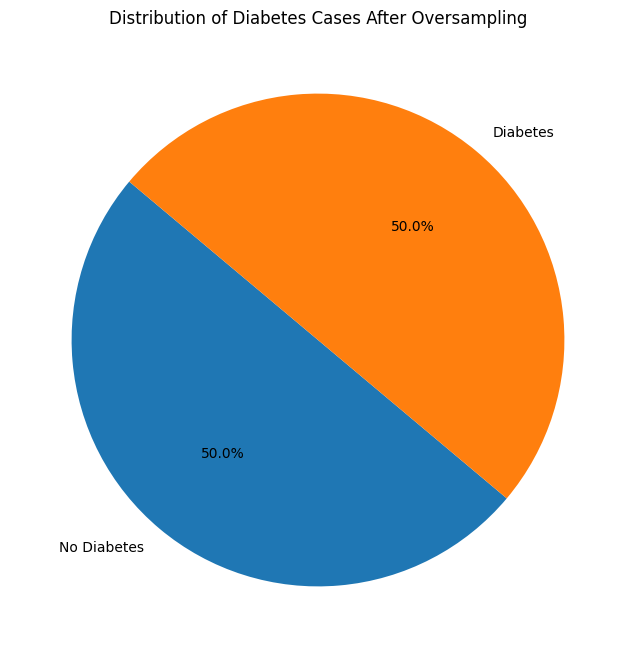

In [22]:
plt.figure(figsize=(12, 8))
plt.pie(diabetes_y.value_counts(), labels=["No Diabetes", "Diabetes"], autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Diabetes Cases After Oversampling")
plt.show()

In [ ]:
print("Balanced dataset:")
print(f"positive cases:{diabetes_x_resampled[diabetes_y_resampled == 1].shape[0]}\n Negetive cases:{diabetes_x_resampled[diabetes_y_resampled == 0].shape[0]}")

Balanced dataset:
positive cases:500
 Negetive cases:500


In [27]:
diabetes_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
995,1,122,64,32,156,35.1,0.692,30
996,0,131,0,0,0,43.2,0.270,26
997,8,120,0,0,0,30.0,0.183,38
998,4,111,72,47,207,37.1,1.390,56


In [29]:
diabetes_combined=pd.concat([diabetes_x,diabetes_y],axis=1)

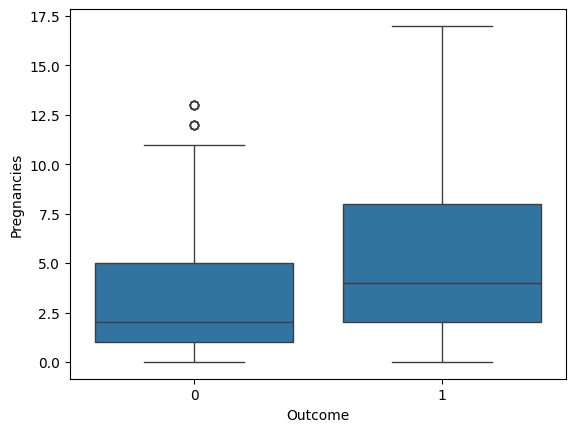

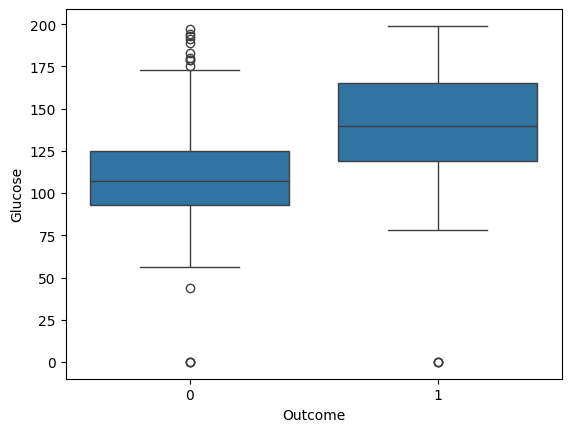

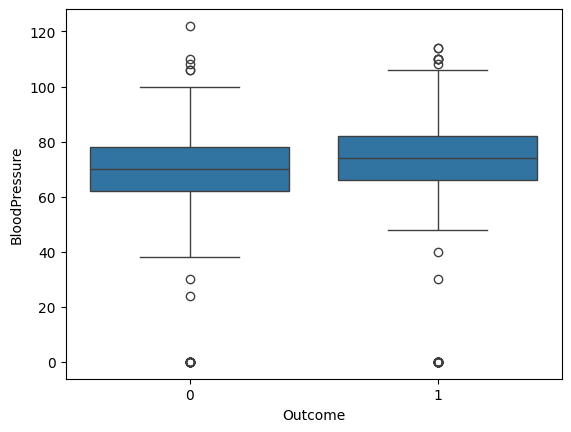

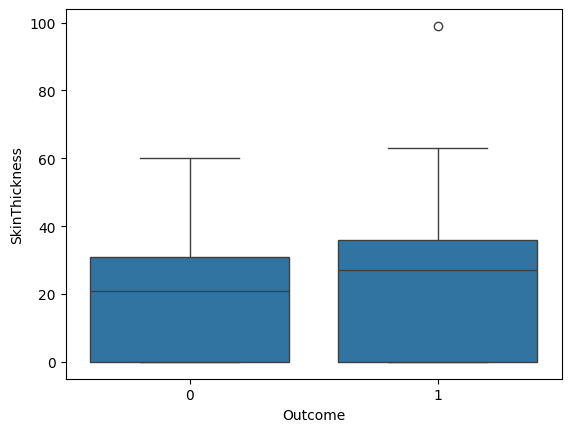

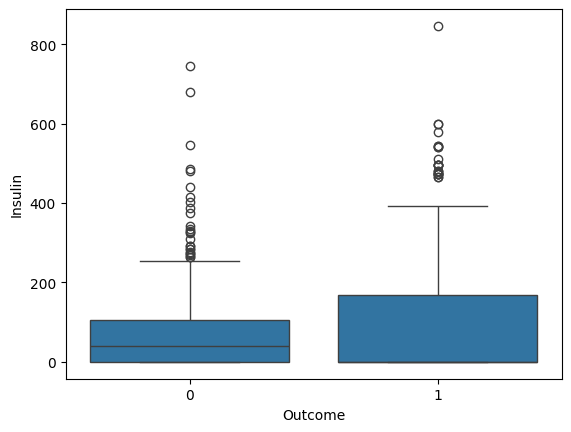

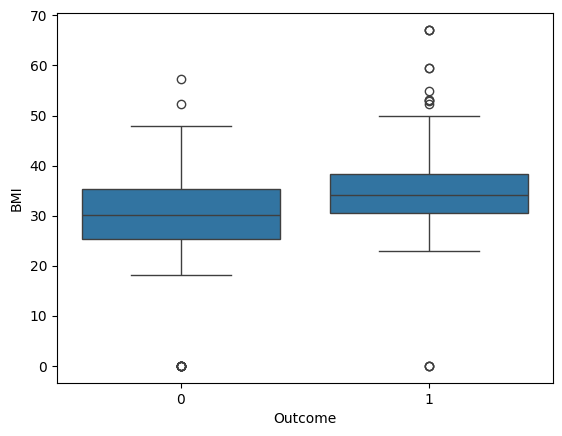

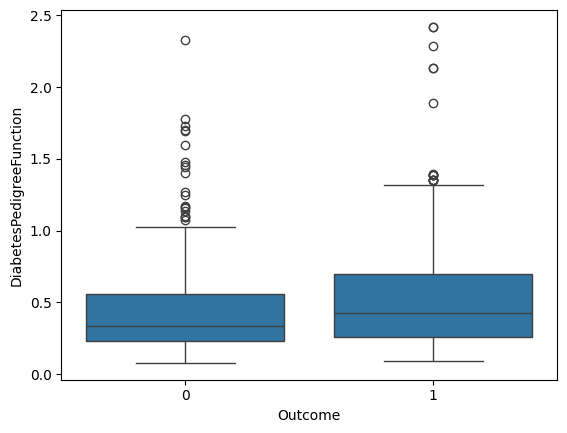

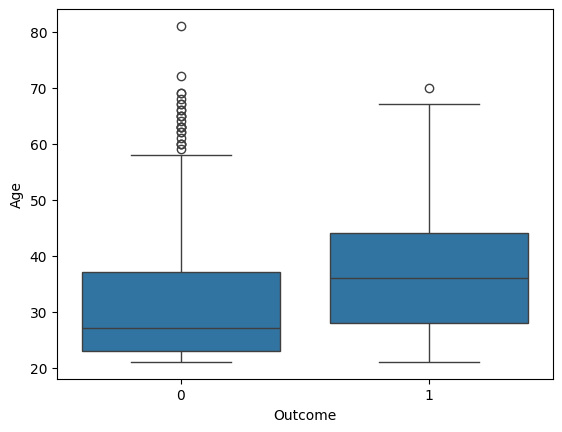

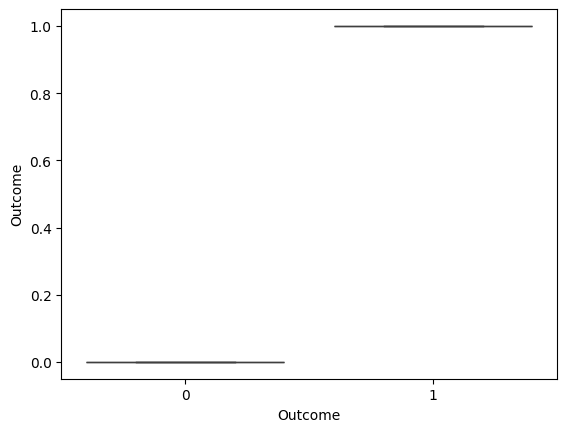

In [31]:
for col in diabetes_combined.columns:
    plt.figure()
    sns.boxplot(diabetes_combined, x="Outcome", y=col)

In [32]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[(df[col] < lower_bound)] = pd.NA
        df[(df[col] > upper_bound)] = pd.NA
    return df

In [33]:
diabetes_x = remove_outliers(diabetes_x, diabetes_x.columns)

In [34]:
diabetes_x_copy = remove_outliers(diabetes_x_copy, diabetes_x_copy.columns)

In [35]:
combined_df = pd.concat([diabetes_x, diabetes_y], axis=1)
combined_df_cp = pd.concat([diabetes_x_copy, diabetes_y_copy], axis=1)

In [36]:
combined_df.dropna(inplace=True)
combined_df_cp.dropna(inplace=True)

In [37]:
diabetes_x = combined_df.drop("Outcome", axis=1)
diabetes_y = combined_df["Outcome"]
diabetes_x_copy = combined_df_cp.drop("Outcome", axis=1)
diabetes_y_copy = combined_df_cp["Outcome"]

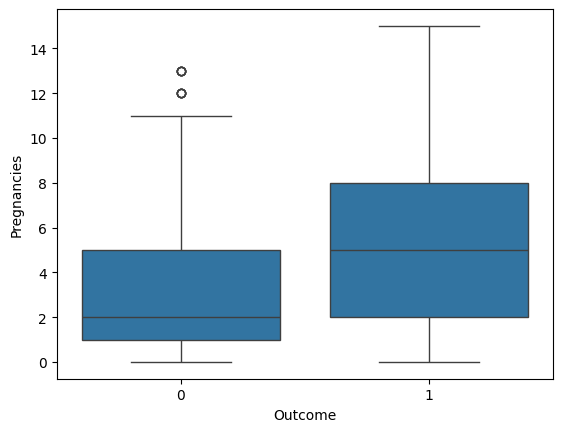

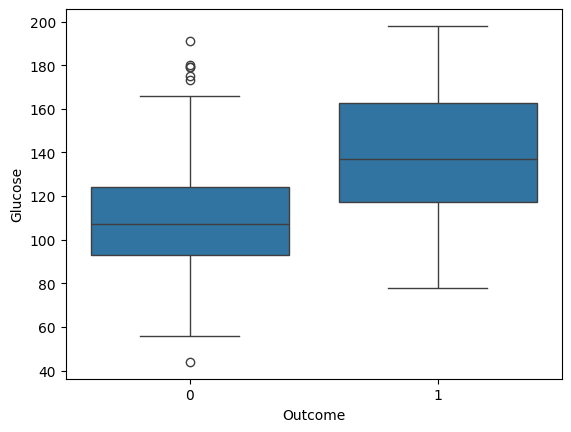

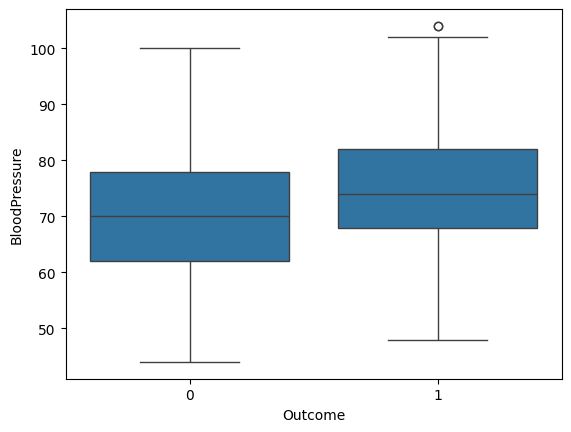

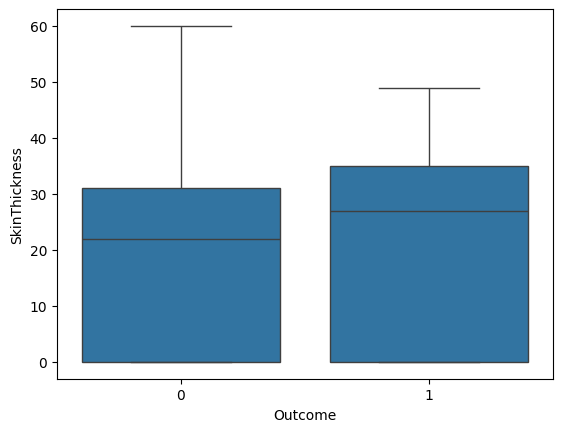

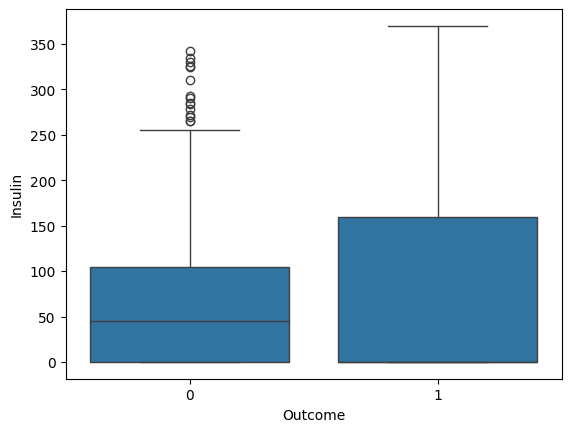

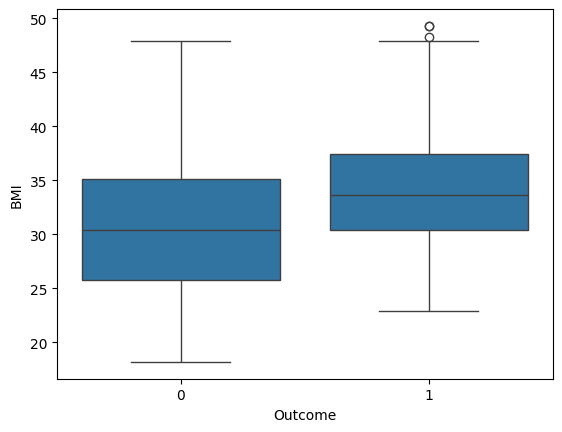

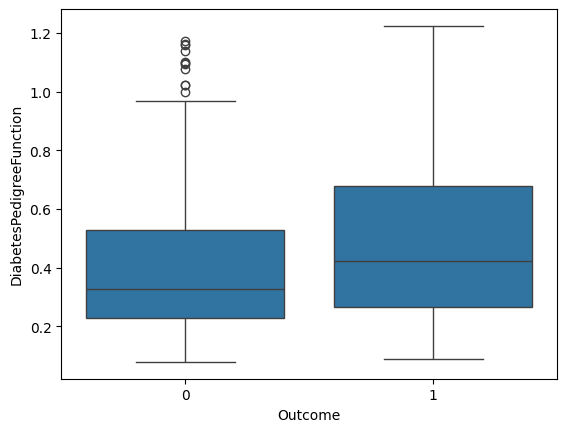

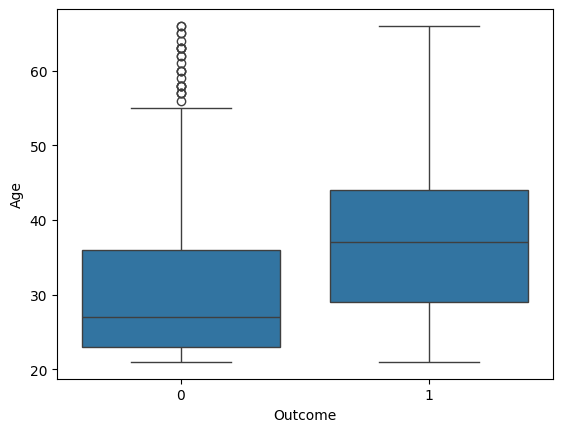

In [39]:
for col in diabetes_x.columns:
    plt.figure()
    sns.boxplot(data=diabetes_x, x=diabetes_y, y = col)

In [40]:
print(f"After removing outliers, there are {diabetes_x.shape[0]} samples left.")
print(f"There are {diabetes_x[diabetes_y == 1].shape[0]} positive cases and {diabetes_x[diabetes_y== 0].shape[0]} negative cases")

After removing outliers, there are 835 samples left.
There are 394 positive cases and 441 negative cases


<Axes: >

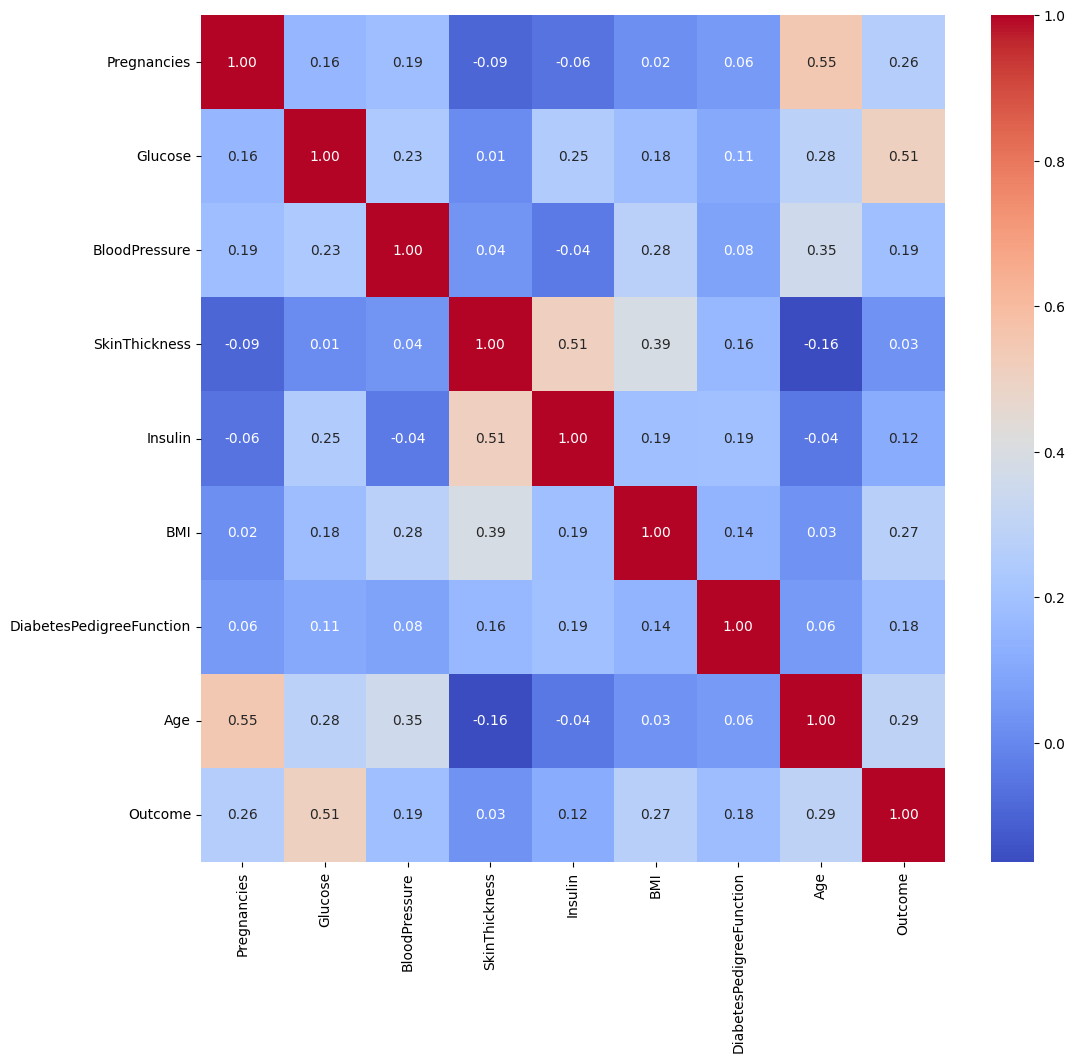

In [41]:
corr = combined_df.corr()
plt.figure(figsize=(12, 11))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

<Axes: >

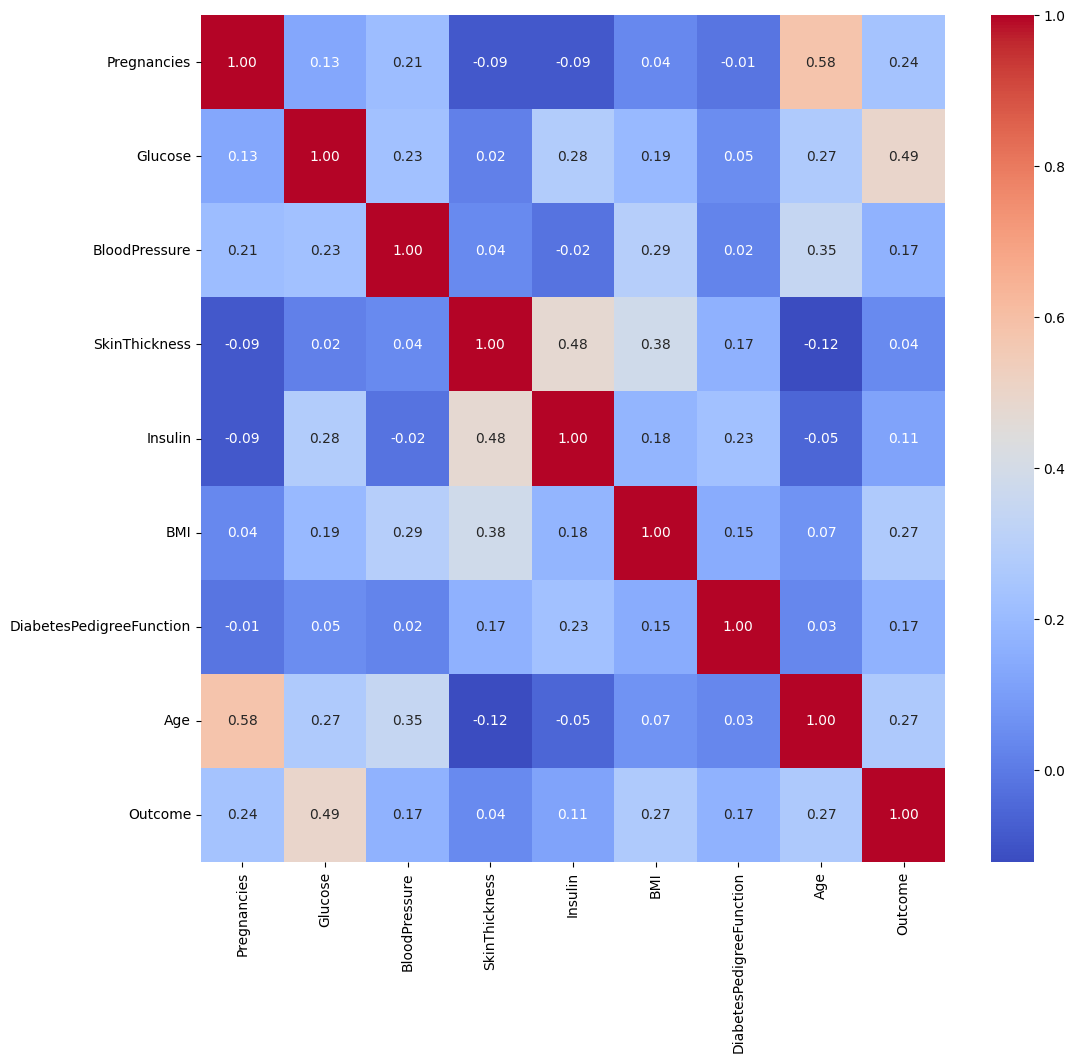

In [42]:
corr_cp = combined_df_cp.corr()
plt.figure(figsize=(12, 11))
sns.heatmap(corr_cp, annot=True, fmt=".2f", cmap="coolwarm")

In [45]:
scaler = StandardScaler()
diabetes_X_scaled = scaler.fit_transform(diabetes_x)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_scaled, diabetes_y, test_size=0.2, random_state=42)

In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = model.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8802395209580839


In [50]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[75 13]
 [ 7 72]]


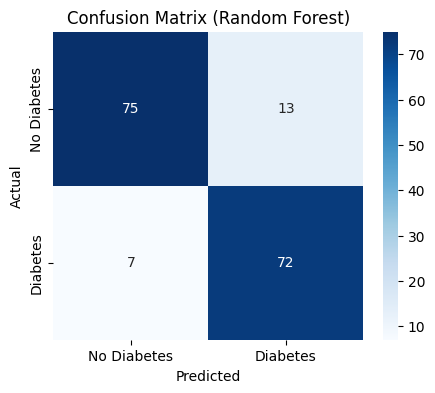

In [51]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [52]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        88
           1       0.85      0.91      0.88        79

    accuracy                           0.88       167
   macro avg       0.88      0.88      0.88       167
weighted avg       0.88      0.88      0.88       167

